In [1]:
!pip install mmh3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 3.6 MB/s eta 0:00:00


In [4]:
import mmh3  # Use the MurmurHash library

# Assume the player ID is used as the bucketing identifier
player_id = "123456"
# Calculate the hash value
hash_value = mmh3.hash(player_id)

# Assume three experiment groups with sample size ratios of 50%, 25%, 25%
total_range = 100
group_a_range = int(total_range * 0.5)
group_b_range = group_a_range + int(total_range * 0.25)

# Determine which experiment group the player should be assigned to
if hash_value % total_range < group_a_range:
    group = "Group A"
elif hash_value % total_range < group_b_range:
    group = "Group B"
else:
    group = "Group C"

print(f"Player {player_id} is assigned to {group}")

Player 123456 is assigned to Group A


In [5]:
import random
import string
import mmh3

# Function to generate a random ID
def generate_random_id(length=8):
    all_characters = string.ascii_letters + string.digits
    return ''.join(random.choice(all_characters) for i in range(length))

# Generate 100 random IDs
random_ids = [generate_random_id() for _ in range(100)]

# Assume three experiment groups with sample size ratios of 50%, 25%, 25%
total_range = 100
group_a_range = int(total_range * 0.5)
group_b_range = group_a_range + int(total_range * 0.25)

# Assign each ID into an experiment group and output the result
for player_id in random_ids:
    # Compute the hash value
    hash_value = mmh3.hash(player_id)

    # Determine which experiment group the player should be assigned to
    if hash_value % total_range < group_a_range:
        group = "Group A"
    elif hash_value % total_range < group_b_range:
        group = "Group B"
    else:
        group = "Group C"

    print(f"Player {player_id} is assigned to {group}")

Player hMGzVakX is assigned to Group C
Player P6Lzl5fI is assigned to Group A
Player pLG6NC6p is assigned to Group A
Player vWboDm8a is assigned to Group B
Player jlLo04JY is assigned to Group A
Player kKrG2hrR is assigned to Group B
Player V3hJIzCT is assigned to Group B
Player SvN1mcvR is assigned to Group A
Player OQgDixgy is assigned to Group A
Player EdUzFssR is assigned to Group A
Player rXu2OU06 is assigned to Group A
Player Unn6umU0 is assigned to Group A
Player UpFUUZ9o is assigned to Group B
Player r87MYUAj is assigned to Group C
Player CuV4OVFm is assigned to Group A
Player OgqO9ovt is assigned to Group C
Player IV2schy7 is assigned to Group A
Player c7yin9Rj is assigned to Group B
Player xtLJW20P is assigned to Group A
Player PcrwTMYJ is assigned to Group A
Player Q7tJ44Bw is assigned to Group B
Player RJeGS5D5 is assigned to Group A
Player la9rd8VE is assigned to Group A
Player zNnlZXxP is assigned to Group C
Player mwAAqmuX is assigned to Group A
Player KjFeFkj7 is assign

In [6]:
# Change the Font to Chinese because there is Chinese Font in matplotlib

!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2025-10-30 01:40:04--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 108.177.125.100, 108.177.125.138, 108.177.125.101, ...
Connecting to drive.google.com (drive.google.com)|108.177.125.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2025-10-30 01:40:04--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 108.177.125.132, 2404:6800:4008:c01::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|108.177.125.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  --.-KB/s    in 0.1s    

2025-10-30 

Group A actual ratio: 49.45%
Group B actual ratio: 25.27%
Group C actual ratio: 25.28%
Chi-square value: 0.61
p-value: 0.7389
Based on the chi-square test, the distribution is uniform.


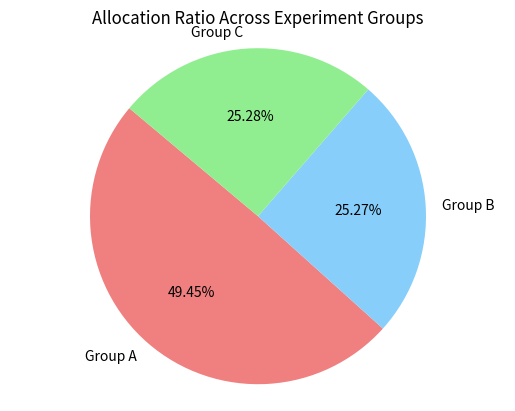

In [8]:
import random
import string
import mmh3
from scipy.stats import chi2_contingency

# Function to generate a random ID
def generate_random_id(length=8):
    all_characters = string.ascii_letters + string.digits
    return ''.join(random.choice(all_characters) for i in range(length))

# Generate 10,000 random IDs (larger sample sizes increase statistical accuracy)
random_ids = [generate_random_id() for _ in range(10000)]

# Assume three experiment groups with target ratios of 50%, 25%, 25%
total_range = 100
group_a_range = int(total_range * 0.5)
group_b_range = group_a_range + int(total_range * 0.25)

# Initialize counters
group_a_count = 0
group_b_count = 0
group_c_count = 0

# Assign each ID to a group and update counts
for player_id in random_ids:
    # Compute the hash value
    hash_value = mmh3.hash(player_id)

    # Decide which group the player belongs to
    if hash_value % total_range < group_a_range:
        group_a_count += 1
    elif hash_value % total_range < group_b_range:
        group_b_count += 1
    else:
        group_c_count += 1

# Calculate actual proportions
total_count = len(random_ids)
actual_ratio_a = group_a_count / total_count
actual_ratio_b = group_b_count / total_count
actual_ratio_c = group_c_count / total_count

# Print actual proportions
print(f"Group A actual ratio: {actual_ratio_a * 100:.2f}%")
print(f"Group B actual ratio: {actual_ratio_b * 100:.2f}%")
print(f"Group C actual ratio: {actual_ratio_c * 100:.2f}%")

# Perform Chi-Square test
observed = [group_a_count, group_b_count, group_c_count]
expected = [total_count * 0.5, total_count * 0.25, total_count * 0.25]
chi2, p, _, _ = chi2_contingency([observed, expected])

# Print chi-square test results
print(f"Chi-square value: {chi2:.2f}")
print(f"p-value: {p:.4f}")
if p > 0.05:
    print("Based on the chi-square test, the distribution is uniform.")
else:
    print("Based on the chi-square test, the distribution is not uniform.")

# Visualization (using matplotlib)
import matplotlib.pyplot as plt

labels = ['Group A', 'Group B', 'Group C']
sizes = [actual_ratio_a, actual_ratio_b, actual_ratio_c]
colors = ['lightcoral', 'lightskyblue', 'lightgreen']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', startangle=140)
plt.axis('equal')
plt.title('Allocation Ratio Across Experiment Groups')
plt.show()
